In [1]:
# Necessary Installs 

In [2]:
# Imports 
import os
import numpy as np
import json
import pickle
import random
import nltk
import tensorflow as tf
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('wordnet')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, LSTM, Activation, Bidirectional,Embedding
from tensorflow.keras.optimizers import SGD
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize



[nltk_data] Downloading package punkt to /home/anirudh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/anirudh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [15]:
os.chdir('/home/anirudh/Documents/ML-ChatBot')

lemmatizer = WordNetLemmatizer()
words=[]
classes = []
documents = []
ignore_words = ['?', '!']
data_file = open('data/intent1.json').read()
intents = json.loads(data_file)

for intent in intents['intents']:
    for pattern in intent['text']:
        w = nltk.word_tokenize(pattern)
        words.extend(w)
        documents.append((w, intent['intent']))
        if intent['intent'] not in classes:
            classes.append(intent['intent'])


{'intents': [{'intent': 'Greeting', 'text': ['Hi', 'Hi there', 'Hola', 'Hello', 'Hello there', 'Hya', 'Hya there'], 'responses': ['Hi human, please tell me your GeniSys user', 'Hello human, please tell me your GeniSys user', 'Hola human, please tell me your GeniSys user'], 'extension': {'function': '', 'entities': False, 'responses': []}, 'context': {'in': '', 'out': 'GreetingUserRequest', 'clear': False}, 'entityType': 'NA', 'entities': []}, {'intent': 'GreetingResponse', 'text': ['My user is Adam', 'This is Adam', 'I am Adam', 'It is Adam', 'My user is Bella', 'This is Bella', 'I am Bella', 'It is Bella'], 'responses': ['Great! Hi <HUMAN>! How can I help?', 'Good! Hi <HUMAN>, how can I help you?', 'Cool! Hello <HUMAN>, what can I do for you?', 'OK! Hola <HUMAN>, how can I help you?', 'OK! hi <HUMAN>, what can I do for you?'], 'extension': {'function': 'extensions.gHumans.updateHuman', 'entities': True, 'responses': ['Hi %%HUMAN%%! How can I help?', 'Hi %%HUMAN%%, how can I help you?'

['!', "'s", ',', '?', 'a', 'about', 'adam', 'adios', 'am', 'any', 'anyone', 'are', 'aware', 'bay', 'be', 'bella', 'bored', 'by', 'bye', 'call', 'camera', 'can', 'cheering', 'clever', 'communicating', 'comprendo', 'conscious', 'could', 'do', 'doing', 'door', 'enough', 'for', 'friend', 'fuck', 'genious', 'get', 'girl', 'give', 'good', 'goodbye', 'gossip', 'got', 'great', 'have', 'hear', 'hello', 'help', 'helpful', 'hi', 'hola', 'hope', 'how', 'hya', 'i', 'identify', 'in', 'intelligent', 'is', 'it', 'joke', 'know', 'later', 'laugh', 'make', 'me', 'mean', 'meant', 'more', 'my', "n't", 'name', 'need', 'not', 'off', 'ok', 'open', 'please', 'pod', 'prove', 'quiet', 'real', 'saying', 'see', 'self', 'self-aware', 'shhh', 'shit', 'shut', 'some', 'speaking', 'stop', 'surely', 'talking', 'tell', 'thank', 'thanks', 'that', 'the', 'there', 'think', 'this', 'time', 'to', 'twat', 'understand', 'up', 'user', 'very', 'wa', 'want', 'well', 'what', 'who', 'why', 'will', 'with', 'you', 'your']


Text(0.5, 1.0, 'Data')

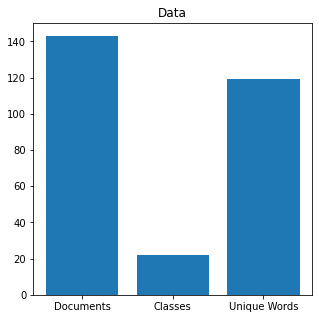

In [18]:
words = [lemmatizer.lemmatize(w.lower()) for w in words]
words = sorted(list(set(words)))
classes = sorted(list(set(classes)))
print((words))

names = ['Documents', 'Classes', 'Unique Words']
values = [len(documents), len(classes), len(words)]
plt.figure(figsize=(5, 5))
plt.bar(names, values)
plt.title('Data')

In [5]:

pickle.dump(words,open('words.pkl','wb'))
pickle.dump(classes,open('classes.pkl','wb'))

In [6]:
training = []
output_empty = [0] * len(classes)
for doc in documents:
    bag = []
    pattern_words = doc[0]
    pattern_words = [lemmatizer.lemmatize(word.lower()) for word in pattern_words]
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    training.append([bag, output_row])

In [7]:
random.shuffle(training)
training = np.array(training)
train_x = list(training[:,0])
train_y = list(training[:,1])

<ipython-input-7-8e8c1affa596>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  training = np.array(training)


In [10]:
model = Sequential()
model.add(Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(Dense(len(train_y[0]), activation='softmax'))

sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

hist = model.fit(np.array(train_x), np.array(train_y), epochs=200, batch_size=5, verbose=1)
model.save('model/chatbot_model.h5', hist)


Epoch 1/200
29/29 [==============================] - 0s 1ms/step - loss: 3.0793 - accuracy: 0.0769
Epoch 2/200
29/29 [==============================] - 0s 1ms/step - loss: 2.8017 - accuracy: 0.4196
Epoch 3/200
29/29 [==============================] - 0s 1ms/step - loss: 2.4991 - accuracy: 0.6084
Epoch 4/200
29/29 [==============================] - 0s 1ms/step - loss: 2.1466 - accuracy: 0.6993
Epoch 5/200
29/29 [==============================] - 0s 1ms/step - loss: 1.7987 - accuracy: 0.7483
Epoch 6/200
29/29 [==============================] - 0s 1ms/step - loss: 1.4949 - accuracy: 0.8392
Epoch 7/200
29/29 [==============================] - 0s 1ms/step - loss: 1.2476 - accuracy: 0.8741
Epoch 8/200
29/29 [==============================] - 0s 1ms/step - loss: 1.0545 - accuracy: 0.8811
Epoch 9/200
29/29 [==============================] - 0s 1ms/step - loss: 0.8942 - accuracy: 0.8951
Epoch 10/200
29/29 [==============================] - 0s 1ms/step - loss: 0.7630 - accuracy: 0.8811
Epoch 11/

In [9]:
from tensorflow.keras.models import load_model
model = load_model('chatbot_model.h5')
import json
import random
def clean_up_sentence(sentence):
    sentence_words = nltk.word_tokenize(sentence)
    sentence_words = [lemmatizer.lemmatize(word.lower()) for word in sentence_words]
    return sentence_words

def bow(sentence, words, show_details=True):
    sentence_words = clean_up_sentence(sentence)
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

def predict_class(sentence, model):
    p = bow(sentence, words,show_details=False)
    res = model.predict(np.array([p]))[0]
    ERROR_THRESHOLD = 0.10
    results = [[i,r] for i,r in enumerate(res) if r>ERROR_THRESHOLD]
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append({"intent": classes[r[0]], "probability": str(r[1])})
    return return_list

def getResponse(ints, intents_json):
    print(ints)
    tag = ints[0]['intent']
    list_of_intents = intents_json['intents']
    for i in list_of_intents:
        if(i['intent']== tag):
            return  random.choice(i['responses'])
            break
    return ''

def chatbot_response(msg):
    ints = predict_class(msg, model)
    res = getResponse(ints, intents)
    return res
chatbot_response("Hey, how's your day been?")

[{'intent': 'NameQuery', 'probability': '0.7013623'}, {'intent': 'CourtesyGreeting', 'probability': '0.18910696'}]


'Call me Geni'